In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from pprint import pprint



# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
#file to load
avg_sq = "Global_Average.csv"

#read the Zillow csv with Zip codes
avg_sq_df = pd.read_csv(avg_sq)

avg_sq_df.head()

,Zip Code,47697.87193496802
0,1996-04,0.000000
1,1996-05,0.151192
2,1996-06,0.154941
3,1996-07,0.088895
4,1996-08,0.079464


In [3]:
avg_sq_df = avg_sq_df.rename(columns={"Zip Code" : "Time Period",
                                     "47697.87193496802" : "Average Price/sqft"})
avg_sq_df.head()

,Time Period,Average Price/sqft
0,1996-04,0.000000
1,1996-05,0.151192
2,1996-06,0.154941
3,1996-07,0.088895
4,1996-08,0.079464


In [4]:
#file to load
inflation_data = "Inflation Rates 1996.csv"

#read the Zillow csv with Zip codes
inflation_df = pd.read_csv(inflation_data)
inflation_df

,Time Period,Inflation Rate
0,1996-04,5.7
1,1996-05,6.7
2,1996-06,7.7
3,1996-07,8.7
4,1996-08,9.7
...,...,...
275,2019-04,2.0
276,2019-05,1.8
277,2019-06,1.6
278,2019-07,1.8


In [5]:
combined_df = pd.merge(avg_sq_df, inflation_df, on="Time Period")
combined_df

,Time Period,Average Price/sqft,Inflation Rate
0,1996-04,0.000000,5.7
1,1996-05,0.151192,6.7
2,1996-06,0.154941,7.7
3,1996-07,0.088895,8.7
4,1996-08,0.079464,9.7
...,...,...,...
275,2019-04,-0.219408,2.0
276,2019-05,-0.125405,1.8
277,2019-06,0.163441,1.6
278,2019-07,0.324316,1.8


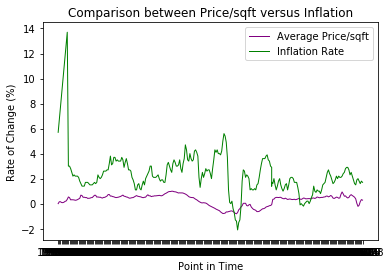

In [12]:
data1 = combined_df['Average Price/sqft']
data2 = combined_df['Inflation Rate']
x_axis = combined_df['Time Period']

plt.title("Comparison between Price/sqft versus Inflation")
plt.xlabel("Point in Time")
plt.ylabel("Rate of Change (%)")

price, = plt.plot(x_axis, data1, color="purple", linewidth=1, label="Average Price/sqft" )
inflation, = plt.plot(x_axis, data2, color="green", linewidth=1, label="Inflation Rate")

#plt.grid()
plt.legend(handles=[price, inflation], loc="best")
plt.savefig('Sqft_Inflation.png')
plt.show()